<a href="https://colab.research.google.com/github/irfqn/MachineLearningTasks/blob/main/6thWeekTasks/KMeans_Clustering_MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi data dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi data
from sklearn.cluster import KMeans  # Mengimpor algoritma KMeans untuk klasterisasi dari pustaka scikit-learn
from sklearn.metrics import silhouette_score  # Mengimpor metrik silhouette_score untuk evaluasi klaster
import numpy as np  # Mengimpor pustaka numpy untuk operasi matematika dan manipulasi array
from sklearn.metrics import davies_bouldin_score  # Mengimpor metrik davies_bouldin_score untuk evaluasi klaster


In [2]:
# Path ke file datasets
file_path = '/Users/rheza/Library/CloudStorage/OneDrive-TelkomUniversity/Machine learning/Minggu 6/Mall_Customers.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

In [3]:
print(df)
df.columns

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
# Mengubah nama atribut dalam dataframe
# Menyimpan dataframe yang telah diubah nama kolomnya dengan fungsi rename
df = df.rename(columns={
    "Annual Income (k$)": "Annual Income",        # Mengubah nama kolom "Annual Income (k$)" menjadi "Annual Income"
    "Spending Score (1-100)": "Spending Score"    # Mengubah nama kolom "Spending Score (1-100)" menjadi "Spending Score"
})


In [5]:
# Menghapus kolom "CustomerID" dan "Gender" dari dataframe
df = df.drop(columns=["CustomerID", "Gender"])
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

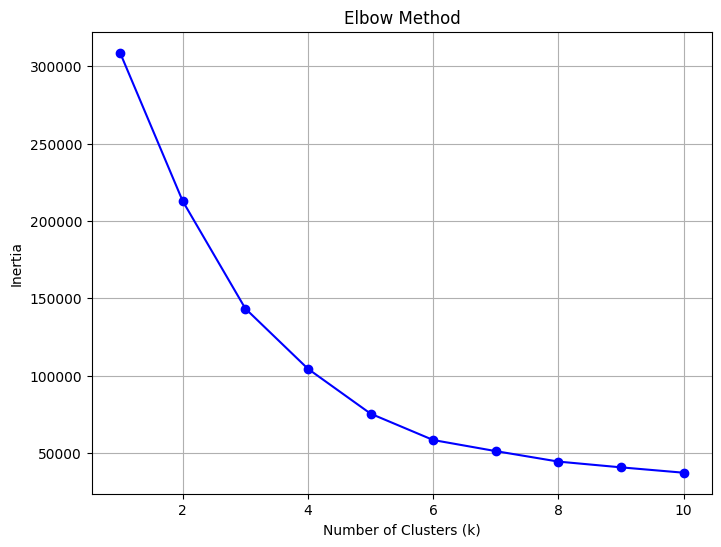

In [10]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['Age', 'Annual Income', 'Spending Score']]  
# Membuat DataFrame baru yang hanya berisi kolom 'Age', 'Annual Income', dan 'Spending Score' dari df

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []  
# Membuat daftar kosong untuk menyimpan nilai inertia dari setiap klaster yang akan dicoba

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=0)  
    # Menginisialisasi model KMeans dengan jumlah klaster k dan random state 0 untuk hasil yang konsisten

    kmeans.fit(attributes)  
    # Melakukan fitting model KMeans pada data attributes

    inertia.append(kmeans.inertia_)  
    # Menambahkan nilai inertia dari model ke dalam daftar inertia

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))  
# Mengatur ukuran figure untuk visualisasi dengan lebar 8 dan tinggi 6

plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')  
# Membuat plot dengan sumbu x menunjukkan jumlah klaster dan sumbu y menunjukkan inertia. 
# Titik setiap klaster ditandai dengan 'o' dan garisnya berwarna biru

plt.title('Elbow Method')  
# Memberikan judul 'Elbow Method' pada plot

plt.xlabel('Number of Clusters (k)')  
# Memberikan label 'Number of Clusters (k)' pada sumbu x

plt.ylabel('Inertia')  
# Memberikan label 'Inertia' pada sumbu y

plt.grid(True)  
# Menambahkan garis grid pada plot untuk memudahkan pembacaan

plt.show()  
# Menampilkan plot


/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


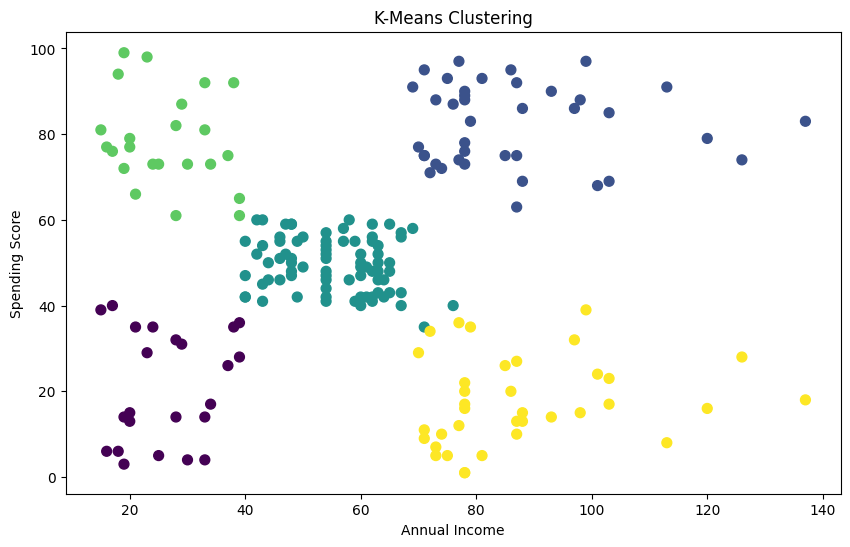

In [7]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [8]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')

Silhouette Score for k=2: 0.2932
Silhouette Score for k=3: 0.3839
Silhouette Score for k=4: 0.4055
Silhouette Score for k=5: 0.4443
Silhouette Score for k=6: 0.4523
Silhouette Score for k=7: 0.4398
Silhouette Score for k=8: 0.4263
Silhouette Score for k=9: 0.4120
Silhouette Score for k=10: 0.3821


/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

In [9]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Davies-Bouldin Index for k=2: 1.3571
Davies-Bouldin Index for k=3: 0.8748
Davies-Bouldin Index for k=4: 0.8915
Davies-Bouldin Index for k=5: 0.8219
Davies-Bouldin Index for k=6: 0.7470
Davies-Bouldin Index for k=7: 0.7948
Davies-Bouldin Index for k=8: 0.8639
Davies-Bouldin Index for k=9: 0.8922
Davies-Bouldin Index for k=10: 0.9575


/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rheza/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init